# DATA PREPROCESSING SAMPLE FOR LOAN PREDICTION

## DATA CLEANING

### Handle Missing Data

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

TrainData = pd.read_csv("Train data.csv", delimiter = ',', header = 0, index_col = 0)
#print(TrainData)

#print("Description of Numerical Features:", TrainData.describe()) 
#Notes!! KEEP IN MIND: 
# CoapplicantIncome: 25% is $0. Later, remove tuples where CoapplicantIncome=0 and analyze on its own.
# Loan_Amount_term: Q1, Q2, Q3 = 360. Which means the data is skewed towards their favor. (360 months loan)
# STD is pretty high for ApplicantIncome=6109 and CoapplicantIncome=2926
# Credit_History: Q1, Q2, Q3 = 1. Which means that most people have credit history.
print("kurtosis: ", TrainData.kurtosis())
print("skew: ", TrainData.skew())

kurtosis:  ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64
skew:  ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


C:\Users\YAS\AppData\Local\Temp\ipykernel_4292\2157134667.py:14: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("kurtosis: ", TrainData.kurtosis())
C:\Users\YAS\AppData\Local\Temp\ipykernel_4292\2157134667.py:15: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("skew: ", TrainData.skew())


Identify missing data of both types, numerical and categorical data

In [69]:
# 1) For Numerical Data

NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
#print(NumericData)

#Numerical data with loan id
TrainData_n = TrainData[NumericData]
#print(TrainData_n, '\n')


#if there are missing values replace with 0
# MissingZero = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value = 0)
# MissingZero.fit(TrainData_n)
# TrainData_n = MissingZero.transform(TrainData_n)
#print(TrainData_n)

#if there are missing values replace with mean
# Note, this method is better than replacing with zeros. (ANALYZE THIS)
MissingStatus1 = SimpleImputer(missing_values = np.NaN , strategy = 'mean')
MissingStatus1.fit(TrainData_n)
TrainData_n = MissingStatus1.transform(TrainData_n)
#print(TrainData_n)

In [77]:
# 2) For Categorical Data
CategoricData = TrainData.select_dtypes(include = ['object']).columns.tolist()
#print(CategoricData)

TrainData_c = TrainData[CategoricData]
#print(TrainData_c, '\n')

# MissingStatus = SimpleImputer(missing_values = np.NaN , strategy = 'most_frequent')
# MissingStatus.fit(TrainData_c)
# TrainData_c = MissingStatus.transform(TrainData_c)
#print(TrainData_c)

#Instead of imputing, we can simply drop the missing values
# Get the number of missing values per column
TrainData_c.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [53]:
# Filling in the missing data
TrainData[NumericData] = TrainData_n
TrainData[CategoricData] = TrainData_c
print(TrainData)
print("example record: ", TrainData.values[0])

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

## Handle Noisy Data
## Binning By pd.cut

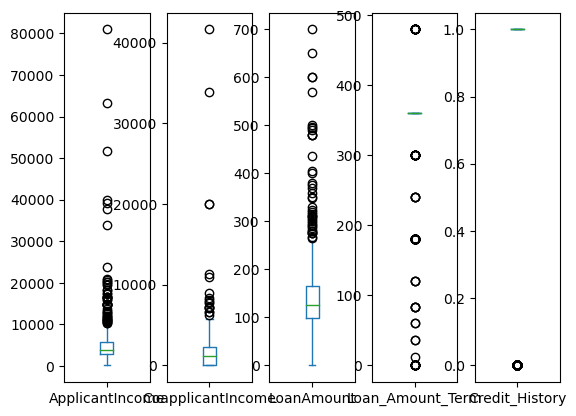

In [51]:
import matplotlib.pyplot as plt
#Histogram plotting
#TrainData.hist()
#plt.show()

#Density plot (like smooth histogram)
#TrainData.plot(kind='density',subplots=True,sharex=False)
#plt.show()

#Box and Whisker plot
TrainData.plot(kind='box',subplots=True,sharex=False,sharey=False)
plt.show()

In [34]:
#Bin by Applicant Income, Coapplicant Income, Loan Amount
print(TrainData['ApplicantIncome'].describe())
#ApplicantIncomeCut = pd.cut(TrainData.iloc[:, 5], 4)
#print(ApplicantIncomeCut)

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


In [35]:
Bins = 10
ApplicantIncomeBinSize = (81000 - 150)/Bins
print(pd.cut(TrainData['ApplicantIncome'], Bins, precision = 0).value_counts(sort=False))

(69.0, 8235.0]        533
(8235.0, 16320.0]      59
(16320.0, 24405.0]     15
(24405.0, 32490.0]      0
(32490.0, 40575.0]      4
(40575.0, 48660.0]      0
(48660.0, 56745.0]      1
(56745.0, 64830.0]      1
(64830.0, 72915.0]      0
(72915.0, 81000.0]      1
Name: ApplicantIncome, dtype: int64


In [36]:
TrainData['ApplicantIncome_Bin'] = pd.cut(TrainData['ApplicantIncome'], Bins, labels = False)
#print(TrainData.head())                                          

In [37]:
print(TrainData['CoapplicantIncome'].describe())

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


In [38]:
print(TrainData['LoanAmount'].describe())

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


## Binning By Feature Engine

In [39]:
from feature_engine.discretisation import EqualWidthDiscretiser

ModuleNotFoundError: No module named 'feature_engine'

In [ ]:
#Bin by Applicant Income, Coapplicant Income, Loan Amount
ApplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
#ApplicantIncomeFE.fit(TrainData)
#ApplicantIncomeFE.transform(TrainData)["ApplicantIncome_b"].value_counts()
#ApplicantIncomeFE = EqualWidthDiscretiser()
#print(ApplicantIncomeFE)
ApplicantIncomeFE.fit(TrainData)
ApplicantIncomeFE.transform(TrainData)["ApplicantIncome"].value_counts()

In [ ]:
CoapplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
CoapplicantIncomeFE.fit(TrainData)
CoapplicantIncomeFE.transform(TrainData)["CoapplicantIncome"].value_counts()

In [ ]:
LoanAmountFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
LoanAmountFE.fit(TrainData)
LoanAmountFE.transform(TrainData)["LoanAmount"].value_counts()

## Binning By KBinsDiscretizer 

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

In [43]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0         0.0             360.0   
LP001003           4583.0             1508.0       128.0             360.0   
LP001005           3000.0                0.0        66.0             360.0   
LP001006           2583.0             2358.0       120.0             360.0   
LP001008           6000.0                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978           2900.0                0.0        71.0             360.0   
LP002979           4106.0                0.0        40.0             180.0   
LP002983           8072.0              240.0       253.0             360.0   
LP002984           7583.0                0.0       187.0             360.0   
LP002990           4583.0                0.0       133.0        

In [44]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0         0.0             360.0   
LP001003           4583.0             1508.0       128.0             360.0   
LP001005           3000.0                0.0        66.0             360.0   
LP001006           2583.0             2358.0       120.0             360.0   
LP001008           6000.0                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978           2900.0                0.0        71.0             360.0   
LP002979           4106.0                0.0        40.0             180.0   
LP002983           8072.0              240.0       253.0             360.0   
LP002984           7583.0                0.0       187.0             360.0   
LP002990           4583.0                0.0       133.0        

D:\My Applications\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\My Applications\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\My Applications\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


## Single Linear Regression

In [45]:
import numpy as np
import pandas as pd

x = TrainData['ApplicantIncome']
y = TrainData['ApplicantIncome']

In [46]:
#Linear Regression of ApplicantIncome and LoanAmount
ApplicantIncomeMean = sum(TrainData['ApplicantIncome'])/614
LoanAmountMean = sum(TrainData['LoanAmount'])/614
print("ApplicantIncomeMean: ", ApplicantIncomeMean,'\n')
print("LoanAmountMean: ", LoanAmountMean, '\n')

ApplicantIncomeMean:  5403.459283387622 

LoanAmountMean:  141.16612377850163 



In [47]:
xxtotal = 0
xytotal = 0
for i in range(614):
    xdiff = (x[i] - ApplicantIncomeMean)**2
    #print("x:", xdiff)
    xxtotal = xxtotal + xdiff
    ydiff = (x[i] - ApplicantIncomeMean) * (y[i] - LoanAmountMean)
    #print("y:", ydiff)
    xytotal = xytotal + ydiff

#Sumxx = np.sum(xdiff, axis = 0, keepdims = True)
#Sumxy = np.sum(ydiff, axis = 0, keepdims = True)
print("SSx: ", "{0: .3f}".format(xxtotal), '\n')
print("SPxy: ", "{0: .3f}".format(xytotal), '\n')

SSx:   22877399172.482 

SPxy:   22877399172.482 



In [48]:
slope = xytotal / xxtotal
print("Slope: ", "{0: .3f}".format(slope), '\n')
intercept = LoanAmountMean - (slope * ApplicantIncomeMean)
print("Intercept: ", "{0: .3f}".format(intercept), '\n')
print("y = ", slope, "x + ", intercept, '\n')

Slope:   1.000 

Intercept:  -5262.293 

y =  1.000000000000002 x +  -5262.293159609131 



In [49]:
predicted = []
residual = []
#residual = predicted - actual
for p in range(len(x)):
    #predicted = slope * (x[p]) + intercept
    predicted.append(slope * (x[p]) + intercept)
    residual.append(predicted[p] - y[p])
    #print("x:", x[p]," y:", y[p], "predicted:", "{0: .2f}".format(predicted[p]), "residual:", "{0: .2f}".format(residual[p]))

#residual = predicted[p] - y[p]
#residual.append(predicted - y[p])

In [50]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig

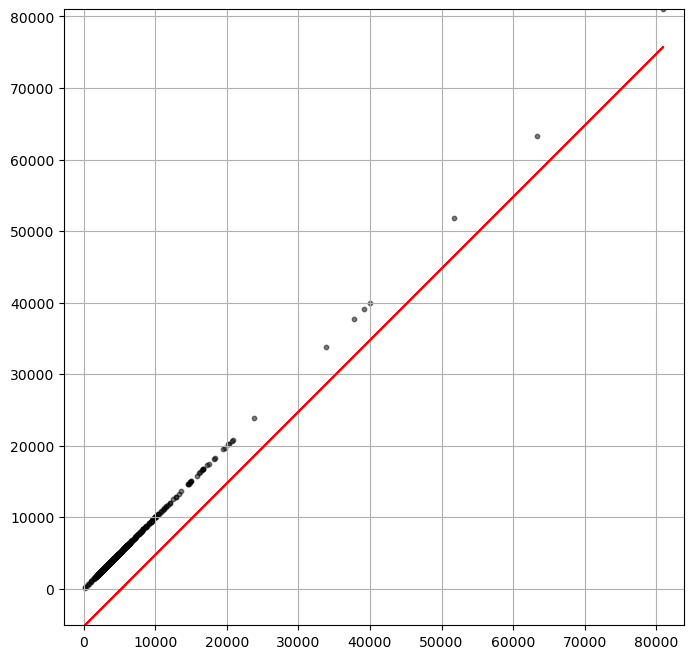

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color = "black", alpha = 0.5, s = 10)
plt.plot(x, predicted, color = "red")
plt.margins(x = 0, y = 0) 
plt.grid()
plt.axis('equal')
plt.show()

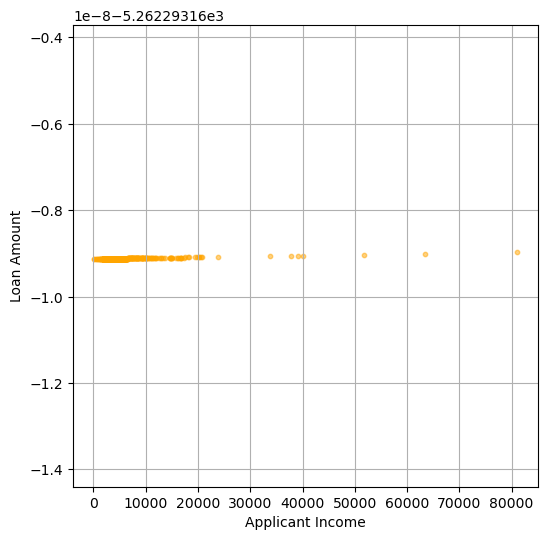

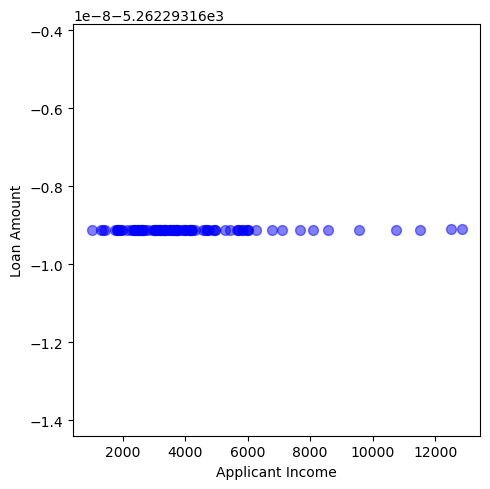

In [52]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools

standardised_residuals = residual / np.std(residual)
#print(standardised_residuals)
plt.figure(figsize=(6,6))
plt.scatter(x, residual, color = "orange", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

#Sample points from the above graph 
def select_subset(seq, size):
    return seq[:size]

plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

Xi_sample = [select_subset(x, 100)]
Yi_sample = [select_subset(residual, 100)]
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.scatter(Xi_sample, 
            Yi_sample, 
            marker="o", color="blue", alpha = 0.5 , s = 50)

In [53]:
'''fig,ax = plt.subplots(6,6)
ax.plot(x, residual)
ax_zoom = plottools.zoom_axes(fig,ax,[0,20000],[-1.0,-0.8],[40000,-0.8],[40000,-0.8])
ax_zoom.plot(x,y)
plt.show()'''

'fig,ax = plt.subplots(6,6)\nax.plot(x, residual)\nax_zoom = plottools.zoom_axes(fig,ax,[0,20000],[-1.0,-0.8],[40000,-0.8],[40000,-0.8])\nax_zoom.plot(x,y)\nplt.show()'

## Multilinear Regression : Dependents and Property and Income VS Loan Amount

In [54]:
#X = TrainData[['Dependents','Property_Area','ApplicantIncome']]
X = TrainData[['ApplicantIncome', 'CoapplicantIncome']]
Y = TrainData['LoanAmount']

In [55]:
from sklearn import linear_model

In [56]:
MultiReg = linear_model.LinearRegression()
MultiReg.fit(X, Y)

LinearRegression()

In [57]:
LoanPredicted = MultiReg.predict([[1000, 1300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[2000, 2300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[3000, 3300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[4000, 4300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[5000, 5300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[6000, 6300]])
print(LoanPredicted)

[102.49516573]
[118.45944088]
[134.42371604]
[150.38799119]
[166.35226635]
[182.3165415]


D:\My Applications\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\My Applications\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\My Applications\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\My Applications\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\My Applications\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\My Applications\anaconda3\lib\site-packages\sklearn\base.py:450: Us

## Clustering By KMeans

In [58]:
import numpy as np
import pandas as pd

In [59]:
TrainDataK = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = "Loan_ID")
print(TrainDataK)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [61]:
KMeanEncoder = LabelEncoder()

KMeanEncoder.fit(TrainDataK["LoanAmount"])
TrainDataK["LoanAmount"] = KMeanEncoder.transform(TrainDataK["LoanAmount"])
KMeanEncoder.fit(TrainDataK["Gender"])
TrainDataK["Gender"] = KMeanEncoder.transform(TrainDataK["Gender"])
KMeanEncoder.fit(TrainDataK["Married"])
TrainDataK["Married"] = KMeanEncoder.transform(TrainDataK["Married"])
KMeanEncoder.fit(TrainDataK["Dependents"])
TrainDataK["Dependents"] = KMeanEncoder.transform(TrainDataK["Dependents"])
KMeanEncoder.fit(TrainDataK["Education"])
TrainDataK["Education"] = KMeanEncoder.transform(TrainDataK["Education"])

KMeanEncoder.fit(TrainDataK["Self_Employed"])
TrainDataK["Self_Employed"] = KMeanEncoder.transform(TrainDataK["Self_Employed"])
KMeanEncoder.fit(TrainDataK["ApplicantIncome"])
TrainDataK["ApplicantIncome"] = KMeanEncoder.transform(TrainDataK["ApplicantIncome"])
KMeanEncoder.fit(TrainDataK["CoapplicantIncome"])
TrainDataK["CoapplicantIncome"] = KMeanEncoder.transform(TrainDataK["CoapplicantIncome"])
KMeanEncoder.fit(TrainDataK["Loan_Amount_Term"])
TrainDataK["Loan_Amount_Term"] = KMeanEncoder.transform(TrainDataK["Loan_Amount_Term"])
KMeanEncoder.fit(TrainDataK["Credit_History"])
TrainDataK["Credit_History"] = KMeanEncoder.transform(TrainDataK["Credit_History"])
KMeanEncoder.fit(TrainDataK["Property_Area"])
TrainDataK["Property_Area"] = KMeanEncoder.transform(TrainDataK["Property_Area"])
KMeanEncoder.fit(TrainDataK["Loan_Status"])
TrainDataK["Loan_Status"] = KMeanEncoder.transform(TrainDataK["Loan_Status"])

In [62]:
KMeanClusters = KMeans(n_clusters = 5).fit(TrainDataK.iloc[:, :])
print(KMeanClusters.labels_, '\n')
print(KMeanClusters.cluster_centers_, '\n')

[1 4 0 2 1 3 0 2 4 3 0 0 2 2 0 4 4 4 4 2 1 3 0 2 3 1 2 4 0 4 3 0 4 4 3 2 0
 4 3 4 4 0 0 3 4 4 4 1 2 3 0 0 4 4 1 0 0 2 3 2 2 0 2 1 4 3 2 1 1 4 2 0 4 4
 1 4 3 2 2 2 4 0 0 3 4 2 2 2 1 3 2 3 0 4 4 1 2 0 4 2 3 3 1 3 4 0 1 1 3 0 4
 2 2 1 4 1 2 0 3 1 3 4 2 0 3 4 1 4 3 3 1 0 0 4 4 3 4 2 1 4 3 1 1 2 1 2 1 0
 1 4 1 2 1 0 0 1 1 1 2 3 0 1 0 4 1 3 4 2 0 1 0 1 4 3 4 4 0 3 4 0 3 2 4 1 4
 3 0 2 2 1 4 1 1 4 4 2 3 2 2 1 2 4 4 4 4 4 0 3 0 4 1 4 1 1 2 4 0 4 4 3 0 4
 2 1 1 4 4 1 4 1 2 4 2 1 0 1 1 4 4 4 3 2 2 1 2 3 1 1 0 0 2 4 2 2 1 0 1 4 1
 4 3 2 4 1 4 3 4 4 4 0 0 1 0 2 4 0 3 0 1 4 3 4 0 0 1 2 0 4 4 1 2 4 0 1 2 4
 1 4 3 2 2 0 4 0 3 0 4 0 1 1 0 2 0 1 0 4 4 2 4 1 2 4 4 2 1 3 4 3 3 0 4 0 0
 1 1 3 1 2 0 4 0 0 4 0 2 2 2 2 3 2 1 3 2 4 0 4 3 4 0 3 4 3 3 2 1 1 0 4 1 3
 1 4 3 2 0 4 3 4 0 4 2 3 1 1 4 4 0 2 2 4 1 1 2 0 0 4 0 0 4 0 0 0 2 0 1 4 2
 0 1 1 4 1 1 2 2 0 0 2 2 0 1 0 0 1 1 2 4 1 0 0 1 1 1 2 4 1 0 0 1 1 3 1 3 1
 3 4 4 4 4 0 0 0 4 2 1 4 4 3 4 1 2 1 2 4 4 1 0 1 2 3 2 0 4 0 3 1 1 0 1 0 4
 0 2 1 1 2 4 1 3 0 2 1 4 

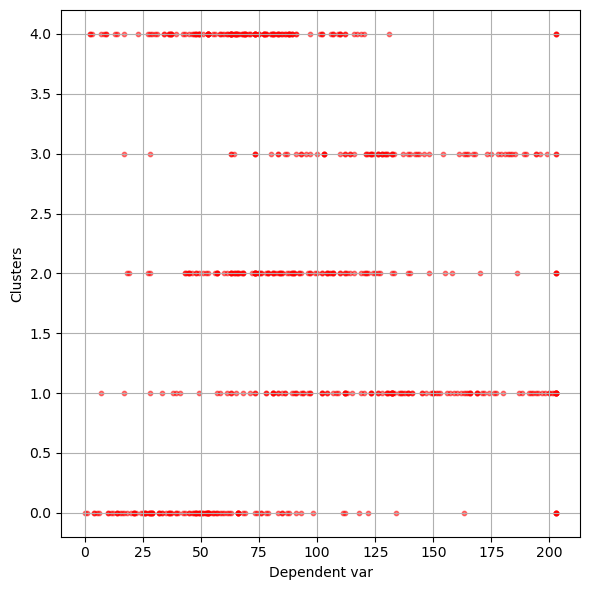

In [63]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools
XDep = TrainDataK['LoanAmount']
plt.figure(figsize=(6,6))
plt.scatter(XDep, KMeanClusters.labels_, color = "red", alpha = 0.5 , s = 10)
#plt.scatter(XDep, KMeanClusters.cluster_centers_, color = "black", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Dependent var')
plt.ylabel('Clusters')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

## Clustering By KMedoids

In [64]:
import numpy as np
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'

In [65]:
X = np.asarray([[1, 2], [1, 4], [1, 0],
                [4, 2], [4, 4], [4, 0]])
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
kmedoids.labels_
array([0, 0, 0, 1, 1, 1])
kmedoids.predict([[0,0], [4,4]])
array([0, 1])
kmedoids.cluster_centers_
array([[1., 2.],
       [4., 2.]])
kmedoids.inertia_

NameError: name 'KMedoids' is not defined